# Plotting New York State (NYS) Mesonet Data with Archived High-Resolution Rapid Refresh (HRRR) Model Data
This notebook plots NYS Mesonet data from surface-based flux, standard, and profiler site information from 2023-06-06 through 2023-06-07 to analyze the surface energy budget under a severe Canadian wildfire smoke event in the northeast United States. This code was written for a final project in MET 335 (Micrometeorology) at SUNY Oswego during the Fall 2025 semester. </p>
#### **Disclaimer:** To navigate this notebook, please see the *Table of Contents* where you will find three key sections: Part 1 *(spatial plots)*, Part 2 *(temporal plots)*, and Part 3 *(profiler plots)* </p>
#### **RESOURCES:** </p>
>[Request NYS Mesonet data (please take note of their disclaimer at the top of the webpage](https://www.nysmesonet.org/weather/requestdata) </p>
>[Herbie module documentation](https://herbie.readthedocs.io/en/latest/index.html) </p>
>[HRRR variable list](https://mesowest.utah.edu/html/hrrr/zarr_documentation/html/zarr_variables.html) </p>
>[**Flux** NYS Mesonet network documentation](https://www.nysmesonet.org/documents/NYSM_Readme_Flux.pdf) </p>
>[**Standard** NYS Mesonet network documentation](https://www.nysmesonet.org/documents/NYSM_Readme_Standard.pdf) </p>
>[**Profiler** NYS Mesonet network documentation](https://nysmesonet.org/documents/NYSM_Readme_Profiler.pdf) </p>
***

## INSTALLATIONS & IMPORTS
Install and import all necessary packages and modules. Also, import necessary datasets
***

In [1]:
pip install herbie-data

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install cmweather

In [3]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
from herbie import Herbie
import matplotlib as mplt
import matplotlib.cm as cm
import cmweather

# NYS Mesonet Profiler Plots

In [4]:
# read in profiler data
df=pd.read_csv(r'/home/jovyan/Desktop/Micrometeorology/Profiler data/NYSMesonet_3D_2023-06_06-07.csv')# 20230606-3d
df['datetime']=pd.to_datetime(df['time'])
df.columns

Index(['station', 'time', 'range [m]', 'cnr [dB]', 'u [m/s]', 'v [m/s]',
       'w [m/s]', 'velocity [knots]', 'direction [degree]',
       'pressure_level [millibar]', 'temperature [K]', 'relative_humidity [%]',
       'liquid [g/m^3]', 'vapor_density [g/m^3]', 'datetime'],
      dtype='object')

In [5]:
# map lats and lons to sites
lat_vals=[42.75175, 43.78823, 40.87248, 42.99359, 44.889, 42.01243, 40.97039, 43.06874,
         42.02493, 40.73433, 42.99983, 40.60401, 40.91957, 41.13303, 44.22425, 40.65025, 43.2601]
lon_vals=[-73.81128, -76.11765, -73.89352, -78.79461, -73.46634, -79.62746, -72.20094, -76.46999,
         -76.25307, -73.81585, -73.88412, -74.14849, -73.13328, -74.08597,-74.44105, -73.5054, -77.41238]
lats = {
    'PROF_ALBA': lat_vals[0],
    'PROF_BELL': lat_vals[1],
    'PROF_BRON': lat_vals[2],
    'PROF_BUFF': lat_vals[3],
    'PROF_CHAZ': lat_vals[4],
    'PROF_CLYM': lat_vals[5],
    'PROF_EHAM': lat_vals[6],
    'PROF_JORD': lat_vals[7],
    'PROF_OWEG': lat_vals[8],
    'PROF_QUEE': lat_vals[9],
    'PROF_REDH': lat_vals[10],
    'PROF_STAT': lat_vals[11],
    'PROF_STON': lat_vals[12],
    'PROF_SUFF': lat_vals[13],
    'PROF_TUPP': lat_vals[14],
    'PROF_WANT': lat_vals[15],
    'PROF_WEBS': lat_vals[16]
}
lons = {
    'PROF_ALBA': lon_vals[0],
    'PROF_BELL': lon_vals[1],
    'PROF_BRON': lon_vals[2],
    'PROF_BUFF': lon_vals[3],
    'PROF_CHAZ': lon_vals[4],
    'PROF_CLYM': lon_vals[5],
    'PROF_EHAM': lon_vals[6],
    'PROF_JORD': lon_vals[7],
    'PROF_OWEG': lon_vals[8],
    'PROF_QUEE': lon_vals[9],
    'PROF_REDH': lon_vals[10],
    'PROF_STAT': lon_vals[11],
    'PROF_STON': lon_vals[12],
    'PROF_SUFF': lon_vals[13],
    'PROF_TUPP': lon_vals[14],
    'PROF_WANT': lon_vals[15],
    'PROF_WEBS': lon_vals[16]
}
df['latitude'] = df['station'].map(lats)
df['longitude'] = df['station'].map(lons)

/tmp/ipykernel_168/2367372316.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno', len(sites))


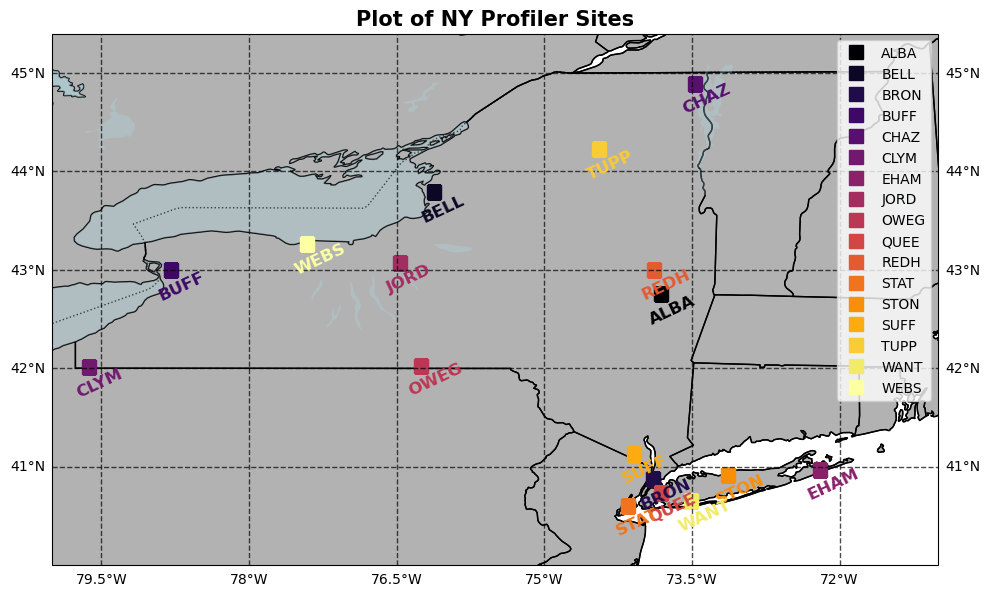

In [6]:
# PLOT ALL SITES
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='black',alpha=0.3)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', alpha=0.3)

sites=df['station'].unique()
cmap = cm.get_cmap('inferno', len(sites))

for i,site in enumerate(sites):
    lon=df.loc[df['station'] == site]['longitude'].unique()
    lat=df.loc[df['station']== site]['latitude'].unique()
    ax.plot(lon, lat, 's',markersize=10, color=cmap(i), label=f'{site[5::]}')
    ax.text(lon-0.15,lat-0.3,f'{site[5::]}', rotation=25, color=cmap(i),fontweight='bold', fontsize=12)

gl = ax.gridlines(draw_labels=True,linewidth=1, color='black', alpha=0.7, linestyle='--')
gl.top_labels = False
ax.set_extent([-80, -71, 40, 45.4])  
ax.legend(loc='upper right')
ax.set_title('Plot of NY Profiler Sites', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('PART3_sites.png',dpi=300)

In [7]:
# investigate OWEG site
df=df.loc[df['station'] == 'PROF_OWEG']
df=df.loc[(df['time'] >= '2023-06-06 18:00:00 UTC') & (df['time'] <= '2023-06-07 18:00:00 UTC')]
df

,station,time,range [m],cnr [dB],u [m/s],v [m/s],w [m/s],velocity [knots],direction [degree],pressure_level [millibar],temperature [K],relative_humidity [%],liquid [g/m^3],vapor_density [g/m^3],datetime,latitude,longitude
217980,PROF_OWEG,2023-06-06 18:05:00 UTC,0,NaN,NaN,NaN,NaN,NaN,NaN,952.9,292.2,38.9,0.003,6.4,2023-06-06 18:05:00+00:00,42.02493,-76.25307
217981,PROF_OWEG,2023-06-06 18:05:00 UTC,25,NaN,NaN,NaN,NaN,NaN,NaN,950.1,290.9,45.4,0.002,6.6,2023-06-06 18:05:00+00:00,42.02493,-76.25307
217982,PROF_OWEG,2023-06-06 18:05:00 UTC,50,NaN,NaN,NaN,NaN,NaN,NaN,947.3,289.7,52.0,0.001,6.8,2023-06-06 18:05:00+00:00,42.02493,-76.25307
217983,PROF_OWEG,2023-06-06 18:05:00 UTC,75,NaN,NaN,NaN,NaN,NaN,NaN,944.5,289.2,53.3,0.001,6.9,2023-06-06 18:05:00+00:00,42.02493,-76.25307
217984,PROF_OWEG,2023-06-06 18:05:00 UTC,100,-13.2,6.1,-7.7,-0.1,19.1,321.3,941.7,288.8,54.5,0.001,6.9,2023-06-06 18:05:00+00:00,42.02493,-76.25307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641479,PROF_OWEG,2023-06-07 17:55:00 UTC,9000,NaN,NaN,NaN,NaN,NaN,NaN,281.4,220.0,11.4,0.001,0.0,2023-06-07 17:55:00+00:00,42.02493,-76.25307
641480,PROF_OWEG,2023-06-07 17:55:00 UTC,9250,NaN,NaN,NaN,NaN,NaN,NaN,270.9,218.6,8.9,0.001,0.0,2023-06-07 17:55:00+00:00,42.02493,-76.25307
641481,PROF_OWEG,2023-06-07 17:55:00 UTC,9500,NaN,NaN,NaN,NaN,NaN,NaN,260.6,217.3,9.8,0.001,0.0,2023-06-07 17:55:00+00:00,42.02493,-76.25307
641482,PROF_OWEG,2023-06-07 17:55:00 UTC,9750,NaN,NaN,NaN,NaN,NaN,NaN,250.7,216.6,7.8,0.001,0.0,2023-06-07 17:55:00+00:00,42.02493,-76.25307


In [8]:
# set variable of interest
variable_list = ['vapor_density [g/m^3]', 'temperature [K]', 'relative_humidity [%]', 'liquid [g/m^3]', 'cnr [dB]']
variable_str_list = ['Vapor Density (g m$^{-3}$)', 'Temperature (K)', 'Relative Humidity (%)', 'Liquid (g m$^{-3}$)', 'Carrier-to-Noise (dB)']
colors = ['magma', 'inferno', 'YlGn', 'Blues', 'ChaseSpectral']

num_p = 4
variable=variable_list[num_p]
variable_str=variable_str_list[num_p]
color=colors[num_p]

# create a new dataframe to reshape the grid. if you try to run the code with a regular pcolormesh(t,h,var) with no pivot, you'll get an error (less variables than expected)
df_pivot = df.pivot(index='range [m]', columns='time', values=variable) # index is now the range values and not time. time becomes the columns populating the df. the values in each column correspond to 
                                                                        # variable values at each range value for each time
df_pivot

time,2023-06-06 18:05:00 UTC,2023-06-06 18:15:00 UTC,2023-06-06 18:25:00 UTC,2023-06-06 18:35:00 UTC,2023-06-06 18:45:00 UTC,2023-06-06 18:55:00 UTC,2023-06-06 19:05:00 UTC,2023-06-06 19:15:00 UTC,2023-06-06 19:25:00 UTC,2023-06-06 19:35:00 UTC,...,2023-06-07 16:25:00 UTC,2023-06-07 16:35:00 UTC,2023-06-07 16:45:00 UTC,2023-06-07 16:55:00 UTC,2023-06-07 17:05:00 UTC,2023-06-07 17:15:00 UTC,2023-06-07 17:25:00 UTC,2023-06-07 17:35:00 UTC,2023-06-07 17:45:00 UTC,2023-06-07 17:55:00 UTC
range [m],,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,-13.2,-13.3,-13.0,-13.2,-13.6,-13.6,-13.9,-14.8,-14.5,-14.8,...,-10.2,-10.5,-10.8,-10.6,-10.6,-10.9,-11.1,-10.8,-10.7,-11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


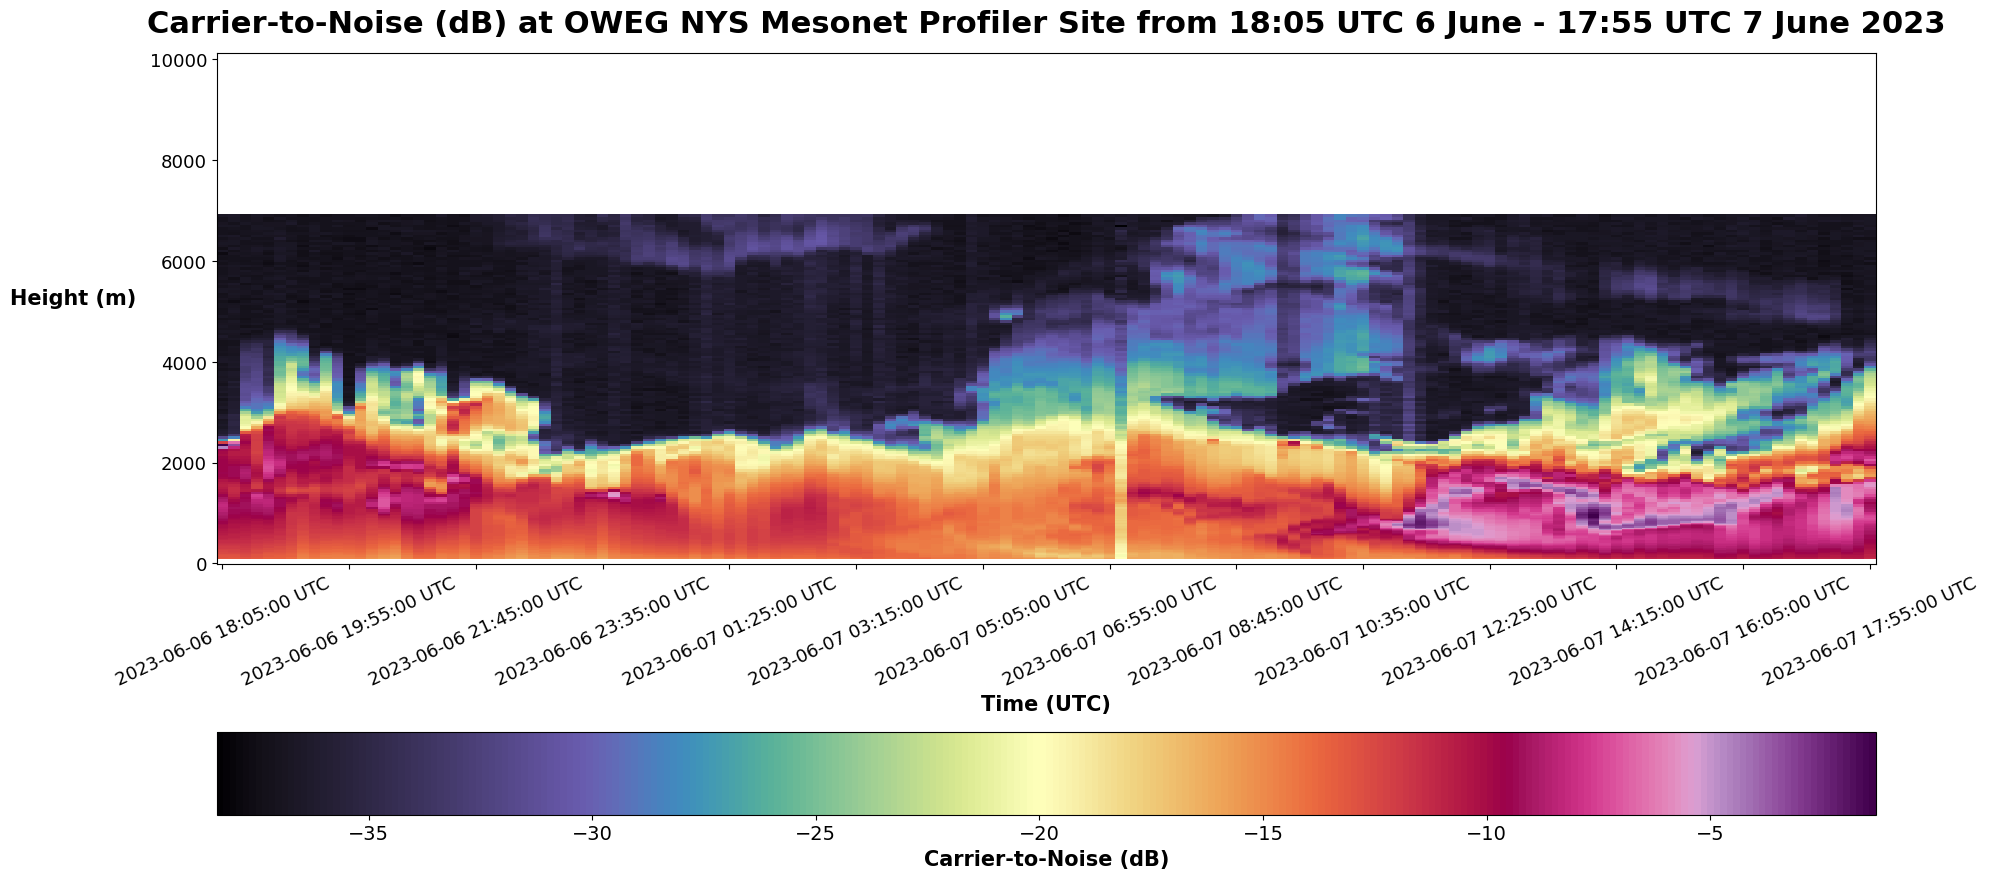

In [9]:
# set values/objects
h = df_pivot.index.values # since h is the index now, call .index to get the values
t = df_pivot.columns.values # call the time values since they're now populating the df's columns
var = df_pivot.values # call the values of the table. they'll populate col x row of the array based on their position in the df
site=df['station'].unique()[0]
site=site[5::]

# plot data
fig=plt.figure(figsize=(20,9))
mesh = plt.pcolormesh(t, h, var, cmap=color)
cbar=plt.colorbar(mesh, label=variable_str, orientation='horizontal', pad=0.21)
cbar.set_label(f'{variable_str}', fontsize = 15, fontweight = 'bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(t[::11],rotation=25)
plt.tick_params(axis='both', labelsize=13)
plt.ylabel('Height (m)', fontweight='bold', fontsize=15, rotation='horizontal', labelpad=55)
plt.xlabel('Time (UTC)', fontweight='bold', fontsize=15)
plt.title(f'{variable_str} at {site} NYS Mesonet Profiler Site from 18:05 UTC 6 June - 17:55 UTC 7 June 2023', fontweight='bold',fontsize=22, pad=15)
plt.tight_layout()
plt.savefig(f'/home/jovyan/Desktop/Micrometeorology/Profiler data/PLOTS/0607-2023_june_{variable_str}.png',dpi=300)

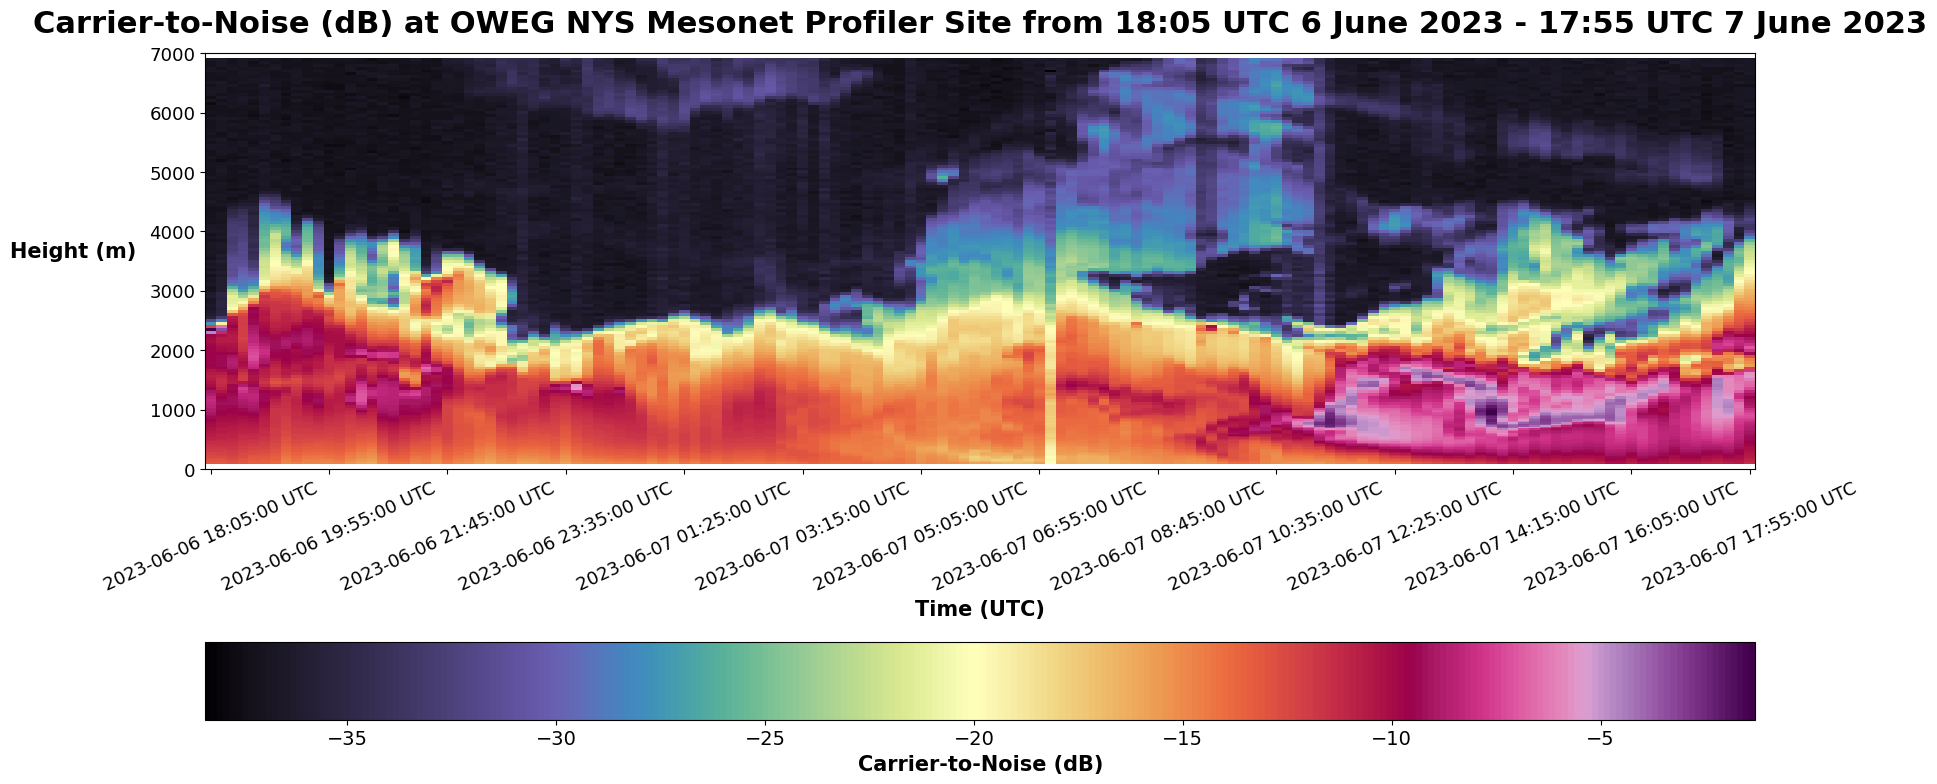

In [10]:
# CHANGE THE YLIM -- no data above 7000 m
# set values/objects
h = df_pivot.index.values # since h is the index now, call .index to get the values
t = df_pivot.columns.values # call the time values since they're now populating the df's columns
var = df_pivot.values # call the values of the table. they'll populate col x row of the array based on their position in the df
site=df['station'].unique()[0]
site=site[5::]

# plot data
fig=plt.figure(figsize=(20,9))
mesh = plt.pcolormesh(t, h, var, cmap=color)
cbar=plt.colorbar(mesh, label=variable_str, orientation='horizontal', pad=0.25)
cbar.set_label(f'{variable_str}', fontsize = 15, fontweight = 'bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(t[::11],rotation=25)
plt.ylim(0,7000)
plt.tick_params(axis='both', labelsize=13)
plt.ylabel('Height (m)', fontweight='bold', fontsize=15, rotation='horizontal', labelpad=55)
plt.xlabel('Time (UTC)', fontweight='bold', fontsize=15)
plt.title(f'{variable_str} at {site} NYS Mesonet Profiler Site from 18:05 UTC 6 June 2023 - 17:55 UTC 7 June 2023', fontweight='bold',fontsize=22, pad=15)
plt.savefig(f'/home/jovyan/Desktop/Micrometeorology/Profiler data/PLOTS/0607-2023_june_{variable_str}.png',dpi=300)